In [42]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

In [43]:
url = "/content/power_demand_vs_temperature.csv"

In [44]:
df0 = pd.read_csv(url , index_col = 0)

In [45]:
df0.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


In [46]:
df0.shape

(1096, 2)

In [47]:
df0.describe(include = "all")

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [48]:
print(f"The dataframe has {df0.shape[0]-df0.dropna().shape[0]} invalid rows")

The dataframe has 0 invalid rows


In [49]:
x = df0.drop('demand' , axis = 1)
y = df0['demand']
print(f"X has shape{x.shape}")
print(f"Y has shape{y.shape}")

X has shape(1096, 1)
Y has shape(1096,)


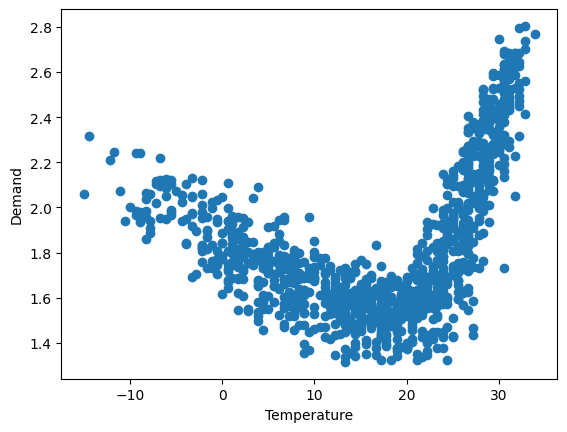

In [50]:
plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.70, random_state=random_state)

In [52]:
print("Training set has {} and {} elements respectively".format(x_train.shape[0], x_test.shape[0]))

Training set has 767 and 329 elements respectively


In [56]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

def print_eval_simple(x, y, model):
    # 1. Get predictions
    pred = model.predict(x)

    # 2. Statsmodels approach for F-stat and p-value
    # Note: We use OLS (Ordinary Least Squares) to get the statistical summary
    x_with_constant = sm.add_constant(x)
    res = sm.OLS(y, x_with_constant).fit()

    # 3. Extract metrics
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    f_stat = res.fvalue
    p_val = res.f_pvalue

    # 4. Print results
    print(f" Mean squared error: \t{mse:.5f}")
    print(f" r2 score: \t\t{r2:.5f}")
    print(f" f-statistic: \t\t{f_stat:.5f}")
    print(f" p-value: \t\t{p_val:.5e}") # Using scientific notation for tiny p-values

    return mse, r2, f_stat, p_val

we can use this by hand func too

In [ ]:
def f_test(y_true, y_pred, n_var, n_obs):
    """ Computation of F-statistic and p-value for the regression
    http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
    Requires: np (numpy) and scipy.stats

    Arguments:
    y_true: ground truth
    y_pred: predictions
    n_var: number of predicting variables
    n_obs: number of observations (the length of y_true and y_pred)

    Returns:
    F: F statistics
    p: p-value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic
    return F, p

def print_eval(X, y, model):
    """ Predicts for X given a fitted model and
        prints prediction quality with respect to y
    Requires f_test (returning F and p-value), mean_squared_error, r2_score

    Arguments:
    X : array-like predicting data
    y : ground truth
    model: predictor fitted model

    Return: MSE, r2_score, F, p-value
    """
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(y,pred), F, p

In [57]:
results = {}

In [80]:
lmodel = LinearRegression()
y_pred = lmodel.fit(x_train, y_train)


In [81]:
results['linear'] = print_eval_simple(x_test, y_test, lmodel)

 Mean squared error: 	0.09122
 r2 score: 		0.14067
 f-statistic: 		53.72007
 p-value: 		1.82552e-12


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


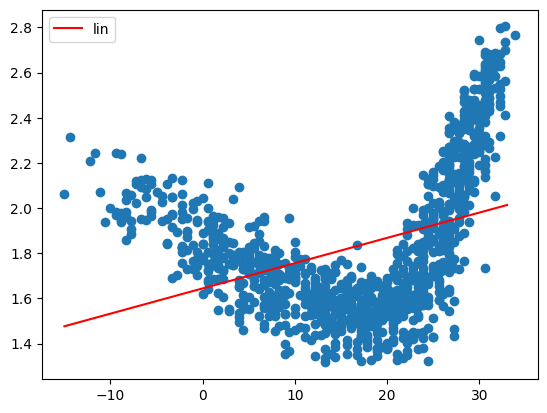

In [88]:
lpred = lmodel.predict(np.arange(min(x.temp), max(x.temp)).reshape(-1,1))
plt.plot(np.arange(min(x.temp), max(x.temp)),lpred, label = "lin", color = "red")
plt.legend()
plt.scatter(x,y)
plt.show();

polynomial regression

Polynomial degree 4
 Mean squared error: 	0.031059
 r2 score: 		0.70742
 f-statistic: 		400.67
 p-value: 		1.1102e-16
Polynomial degree 4
 Mean squared error: 	0.019724
 r2 score: 		0.8142
 f-statistic: 		447.46
 p-value: 		1.1102e-16
Polynomial degree 4
 Mean squared error: 	0.019136
 r2 score: 		0.81973
 f-statistic: 		345.53
 p-value: 		1.1102e-16


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


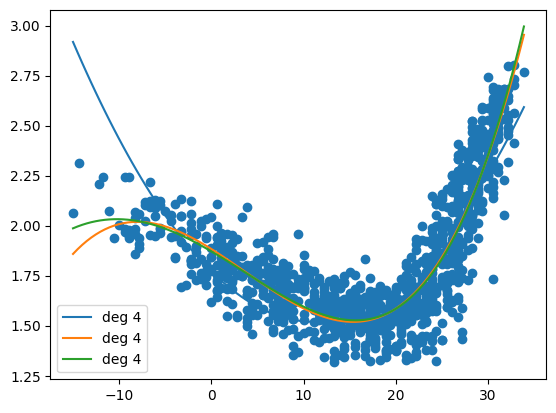

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

degrees = list(range(2,5))

for degree in degrees:
    poly = PolynomialFeatures(degree, include_bias=False)

    Xtr_poly = poly.fit_transform(x_train)
    Xte_poly = poly.transform(x_test)

    model = LinearRegression()
    model.fit(Xtr_poly, y_train)

    print(f"Polynomial degree {d}")
    print_eval(Xte_poly, y_test, model)

    x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
    y_plot = model.predict(poly.transform(x_plot))
    plt.plot(x_plot, y_plot, label=f"deg {d}")

plt.scatter(x, y)
plt.legend()
plt.show()


In [101]:
pd.options.display.float_format = '{:,.5f}'.format
res = pd.DataFrame(results , index = ['rmse' , 'r2' , 'f-statistics' , 'p-value'])
res

,linear,polynomial2,polynomial3,polynomial4
rmse,0.09122,0.03106,0.01972,0.01914
r2,0.14067,0.70742,0.81420,0.81973
f-statistics,53.72007,400.66518,447.45942,345.52706
p-value,0.00000,0.00000,0.00000,0.00000


 Polynomial regression is clearly better than linear for this dataset.

Degree 3 seems best trade-off between fit and complexity.

Degree 4 doesn’t improve much → might overfit.

Metrics tell us:

Lower RMSE → predictions are closer

Higher R² → model explains more variance

High F → model significantly better than mean

Low p → statistically significant

*Linear regression fits poorly. Polynomial regression (degree 2-4) reduces RMSE, increases R², and has higher F-statistics with very low p-values, showing a much better fit. Degree 3 gives the best balance between accuracy and model complexity.*